## 如沒有 graphviz套件，可用conda或pip安裝



In [2]:
import pandas as pd
import graphviz
from sklearn import preprocessing
from sklearn import tree
from sklearn import metrics

In [3]:
#讀取CSV檔案
data = pd.read_csv('weather.csv')

## 切分input 和output

In [4]:
#x:input
x=data.loc[:,['outlook','temperature','humidity','windy']]
#y:output
y=data.loc[:,['play']]

## 轉換屬性及標籤型別

In [5]:
#轉換屬性型態
#將屬性轉為數字label
le = preprocessing.LabelEncoder()
#outlook: overcast: 0, rainy: 1, sunny: 2
X_outlook_encoded=le.fit_transform(x.outlook)
X_temp_encoded=le.fit_transform(x.temperature)
X_humidity_encoded=le.fit_transform(x.humidity)
X_windy_encoded=le.fit_transform(x.windy)

#將play轉為數字label
#play: no: 0 ,yes: 1
Y_play_label=le.fit_transform(y.play)

#將屬性合併
#變成list
feature=list(zip(X_outlook_encoded, X_temp_encoded,X_humidity_encoded,X_windy_encoded))

#轉成array
import numpy as np
features=np.asarray(feature)

## 切分訓練集與資料集

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, Y_play_label, test_size=0.34)

## sklearn: DecisionTreeClassifier

In [8]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=10,max_leaf_nodes = 20)
weather_clf = clf.fit(X_train,y_train)

## 測試模型

In [9]:
predicted = weather_clf.predict(X_test)

# 驗證準確度
accuracy = metrics.accuracy_score(predicted, y_test)
print(accuracy)

0.6


## 產生決策樹圖形

In [10]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("weather") 

'weather.pdf'

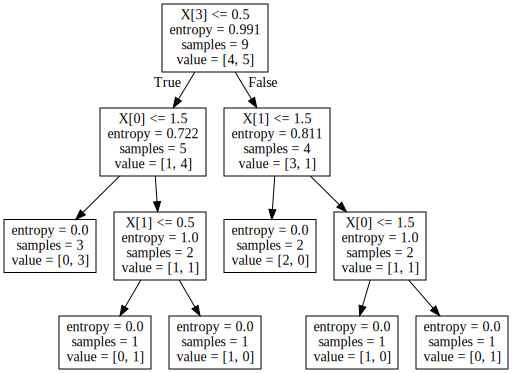

In [11]:
graph